# CIFAR - 10
## INTEGRANTES
### FRANCISCA ALEJANDRA HERNANDEZ PIÑA - 19.422.959-3 - ♀	
### MARCELO ANTONIO LAZO CHAVEZ - 19.303.360-1 - ♂	

# CONTEXTO

![Image1](Images/cifar10img1.png)

![Image2](Images/cifar10img2.png)

![Image3](Images/cifar10img3.png)

# ANÁLISIS DE DISTRIBUCIÓN Y LIMPIEZA DE DATOS

## Distribución de imágenes

![Image4](Images/cifar10img4.png)

## Composición por imagen

![Image5](Images/cifar10img5.png)

## Normalización de datos

![Image6](Images/cifar10img6.png)

![Image7](Images/cifar10img7.png)

# DESARROLLO DE LOS MODELOS

![Image8](Images/cifar10img8.png)

# RED NEURONAL CONVOLUCIONAL

# IMPORTAR LIBRERIAS

In [17]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import requests
import tarfile
import pickle

#### Definir variable estaticas

In [18]:
file_data = 'cifar-10-python.tar.gz'
default_batch_path = './cifar-10-batches-py/'
extension_archivo = '.goku'

In [19]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# DESCARGAR CIFAR-10

In [20]:
def VerifyDataSet():
    """PROCEDIMIENTO QUE SE ENCARGA DE DESCARGAR DE CIFAR-10 QUE CONTIENE LAS IMÁGENES.
    ADEMÁS, DESCOMPRIME EL ARCHIVO DESCARGADO QUE CONTIENE LOS 'BATCH' (ARCHIVOS CON LAS IMÁGENES).
    """
    print("Verificando Archivos del Data Set")
    if not os.path.isfile(file_data):
        print("Descargando DATASET")
        DownloadDataSet()
    print("Descomprimiento Archivo Cifar10.tar.gz")
    DescomprimirTar()
    print("Verificación Completada")

def DownloadDataSet():
    """PROCEDIMINETO QUE DESCARGAR EL DATASET CIFAR-10 DE LA PÁGINA OFICIAL
    """
    chunk_size = 1024
    url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    r = requests.get(url, stream = True)
    total_size = int(r.headers['content-length'])
    with open("cifar-10-python.tar.gz", 'wb') as f:
        for data in tqdm(iterable = r.iter_content(chunk_size = chunk_size), total = total_size/chunk_size, unit = 'KB'):
            f.write(data)

def DescomprimirTar():
    """PROCEDIMIENTO QUE DESCOMPRIME EL ARCHIVO .tar.gz DE CIFAR 10 
    PARA OBTENER LOS ARCHIVOS "BATCHS" CON LOS DATOS DE LAS IMÁGENES
    """
    with tarfile.open(file_data) as tar:
        tar.extractall()
        tar.close()

In [21]:
VerifyDataSet()

Verificando Archivos del Data Set
Descomprimiento Archivo Cifar10.tar.gz
Verificación Completada


# ANALIZANDO DATASET ORIGINAL

In [23]:
def load_batch(name_file):
    """MÉTODO QUE SE ENCARGA DE RETORNAR LOS DATOS RELACIONADOS A IMÁGENES DE UN ARCHIVO "BATCH" DE CIFAR-10
    
    CADA BATCH RETORNA UN CONJUNTO DE 10,000 IMÁGENES DE 10 CLASES DISTINTAS.
    LOS DATOS QUE LEE DE LOS ARCHIVOS BATCH SON LOS VALORES DE LOS LABELS Y DATA.
    LOS LABELS SON LOS VALORES PERTENECIENTES A LA CLASE DE LA IMAGEN.
    LA DATA SON LOS VALORES DE PÍXELES DE LA IMAGEN, ORIGINALMENTE ES UN VECTOR DE (3072,),
    PERO ESTE VECTOR TIENE LA INFORMACIÓN ASOCIADA TANTO DE CADA CANAL DE COLOR DE LA IMAGEN, YA SEA ROJO, VERDE Y AZUL.
    ES POR ELLO QUE EL VECTOR SE DIVIDE POR 3 TAL QUE EL VECTOR DE (3072,) PASA A SER UNA MATRIZ DE (3,1024)
    PERO A ESE VECTOR DE (1024,) DEBEMOS TRANSFORMARLA EN MATRIZ DE (32,32) QUE SERIA LAS DIMENSIONES DE LA IMAGEN,
    DEJANDO FINALMENTE UN MATRIZ MULTIDIMENSIONAL DE (3,32,32).
    FINALMENTE SE APLICA LA TRANSPUESTA DE DICHA MATRIZ FINAL PARA QUE QUEDE CON EL FORMATO DE (32,32,3), ES DECIR
    (HEIGHT,WIDTH,CHANNEL) PARA QUE LA RED CONVOLUCIONAL PUEDA MANEJAR LA INFORMACIÓN.
    
    PARÁMETROS:
    name_file -- NOMBRE DEL ARCHIVO BATCH QUE SE DESEA LEER.
    
    RETORNA:
    labels -- VECTOR COLUMNA CON LOS VALORES DE LA CLASE CORRESPONDIENTE A CADA IMAGEN.
    data -- DATOS ASOCIADOS A LOS PIXELES DE LAS IMÁGENES.
    """
    import pickle
    with open(default_batch_path + name_file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    # ES EL VECTOR/TENSOR1 con los id al cual pertenece la imagen
    labels = dict[b'labels']
    # MATRIZ CON LOS DATOS DE LOS BYTES RGB DE LA IMAGEN, SON 3072
    data = dict[b'data']
    # HAY QUE DIVIDIRLO POR 3 PARA CADA CANAL ROJO, VERDE Y AZUL Y DEJARLOS EN UNA MATRIZ DE 32X32 
    data = data.reshape((len(dict[b'data']), 3, 32, 32))
    # LO DEJAMOS EN FORMATO HEIGHT, WIDTH Y CHANNEL
    data = data.transpose(0, 2, 3, 1) ## (1000,32,32,3)
    return labels, data

In [24]:
# CARGAREMOS EL BATCH UNO PARA PRUEBAS
label_b1,data_b1 = load_batch("data_batch_1")

#### MOSTRAMOS LA MATRIZ DE LA IMAGEN DE (32X32) DEL CANAL AZUL DE LA PRIMERA IMAGEN DEL BATCH 1 DE CIFAR-10
###### EN UN FORMATO AGRADABLE PARA LA VISTA DEL USUARIO XD

In [25]:
pd.DataFrame(data_b1[0].reshape(3,32,32)[0])

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,59,62,63,43,46,45,50,48,43,68,...,110,80,149,117,89,149,120,93,131,103
1,77,125,99,76,142,115,91,144,112,86,...,124,97,64,139,113,78,139,112,75,133
2,105,69,136,105,74,139,108,77,152,120,...,104,158,132,108,152,125,102,148,124,103
3,16,20,20,0,0,0,18,8,0,51,...,86,44,126,87,50,116,79,44,106,70
4,37,101,67,35,105,70,36,113,74,35,...,105,69,27,125,89,46,127,92,46,122
5,85,39,131,89,47,124,82,41,121,79,...,60,123,88,55,119,83,50,122,87,57
6,25,24,21,16,7,0,49,27,8,83,...,82,47,113,77,43,112,78,44,112,79
7,46,106,75,45,105,73,38,128,92,48,...,115,79,43,120,85,47,130,95,54,131
8,96,55,139,102,62,127,90,51,126,89,...,58,118,84,50,120,84,50,109,73,42
9,33,25,17,38,20,4,87,54,25,106,...,62,33,107,68,33,121,84,45,125,90


#### Graficamos la primera imagen del data batch de cifar-10

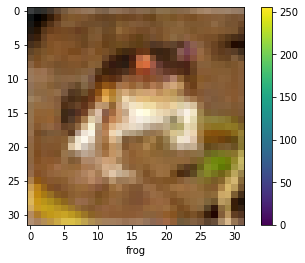

In [26]:
# Mostamos la primera imagen
plt.figure()
plt.imshow(data_b1[0])
plt.colorbar()
plt.xlabel(label_names[label_b1[0]])
plt.grid(False)
plt.show()

#### Ahora graficamos las primeras 25 imágenes del data batch 1, para ver un conjunto de imágenes de diversas clases del problema

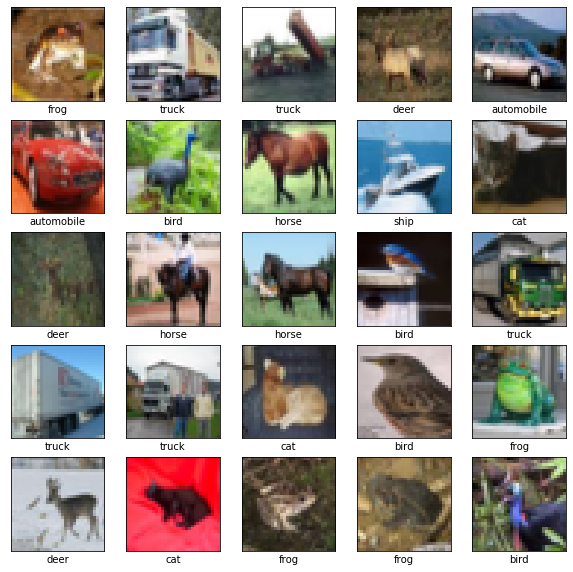

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_b1[i], cmap=plt.cm.binary)
    plt.xlabel(label_names[label_b1[i]])
plt.show()

In [28]:
def Show_Info_Batch(id):
    """PROCEDIMIENTO QUE SE ENCARGA DE IMPRIMIR UN REPORTE DE LAS IMÁGENES DEL DATA BATCH INDICANDO CUANTAS IMÁGENES DE CADA CLASE EXISTE DENTRO DEL BATCH
    
    PARÁMETROS
    id -- ES EL NÚMERO DEL BATCH QUE SE DESEA CARGAR (PUEDE SER DEL 1 AL 5)
    """
    print("-------------BATCH " + str(id) + " -------------")
    if (id > 5 or id < 1):
        print("id out of range")
        return None
    labels, data = load_batch('data_batch_' + str(id))
    
    print("TOTAL IMAGENES: " + str(len(labels)))
    total_label = [0,0,0,0,0,0,0,0,0,0]
    for i in range(len(labels)):
        total_label[labels[i]] = total_label[labels[i]] + 1
    
    for i in range(len(label_names)):
        print(label_names[i] + ": " + str(total_label[i]))
    

##### DESPLEGAMOS UN RESUMEN DE CADA UNOS DE LOS DATA BATCHS DE CIFAR-10

In [29]:
for i in range(1,6):
    Show_Info_Batch(i)

-------------BATCH 1 -------------
TOTAL IMAGENES: 10000
airplane: 1005
automobile: 974
bird: 1032
cat: 1016
deer: 999
dog: 937
frog: 1030
horse: 1001
ship: 1025
truck: 981
-------------BATCH 2 -------------
TOTAL IMAGENES: 10000
airplane: 984
automobile: 1007
bird: 1010
cat: 995
deer: 1010
dog: 988
frog: 1008
horse: 1026
ship: 987
truck: 985
-------------BATCH 3 -------------
TOTAL IMAGENES: 10000
airplane: 994
automobile: 1042
bird: 965
cat: 997
deer: 990
dog: 1029
frog: 978
horse: 1015
ship: 961
truck: 1029
-------------BATCH 4 -------------
TOTAL IMAGENES: 10000
airplane: 1003
automobile: 963
bird: 1041
cat: 976
deer: 1004
dog: 1021
frog: 1004
horse: 981
ship: 1024
truck: 983
-------------BATCH 5 -------------
TOTAL IMAGENES: 10000
airplane: 1014
automobile: 1014
bird: 952
cat: 1016
deer: 997
dog: 1025
frog: 980
horse: 977
ship: 1003
truck: 1022


# ALMACENAR  Y PROCESAR LA INFORMACIÓN DE TODOS LOS BATCHS

In [30]:
def normalize_batch(batch_total):
    """MÉTODO QUE SE ENCARGA DE NORMALIZAR TODAS LAS IMÁGENES DE UN DATA BATCH DE CIFAR-10
    
    PARÁMETROS
    batch_total -- ES EL CONJUNTO DE IMÁGENES PERTENECIENTES AL BATCH
    
    RETORNA
    np.array(valor_temp) -- EL CONJUNTO DE IMÁGENES DEL BATCH NORMALIZADO
    """
    valor_temp = []
    for idx in range(batch_total.shape[0]):
        date_temp = batch_total[idx].copy() # 32,32,3
        valor_temp.append(normalize_image(date_temp).copy())
    return np.array(valor_temp)

In [31]:
def normalize_image(x):
    """MÉTODO QUE SE ENCARGA DE NORMALIZAR UNA IMAGEN
    
    PARÁMETROS
    x - IMAGEN DE DIMENSIONES (32,32,3)
    
    RETORNA
    x - LA IMAGEN NORMALIZADA
    """
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

In [32]:
def ProcessData():
    """PROCEDIMIENTO QUE SE ENCARGA DE NORMALIZAR CADA UNOS DE LOS BATCHES DE ENTRENAMIENTO, VALIDACIÓN Y TESTING DE CIFAR-10
    
    PROCEDIMIENTO QUE SE ENCARGA DE NORMALIZAR CADA UNO DE LOS BATCHES DE IMÁGENES DE CIFAR-10, YA SEA QUE DICHO BATCH
    PERTENEZCA A LOS DATOS DE ENTRENAMIENTO, VALIDACIÓN Y TESTING.
    LOS DATOS DE VALIDACIÓN SERAN UN 10% DE LOS DATOS DE ENTRENAMIENTO.
    
    CABE SEÑALAR QUE UNA VEZ NORMALIZADOS UNO DE LOS BATCHES ESTOS SE ALMACENAN EN ARCHIVOS DE EXTESION ".GOKU"
    QUE ACTUARÁN COMO ARCHIVOS DE INTERCAMBIO DE DATOS (COMO LOS JSON), ESTOS ALMACENARÁN LA INFORMACIÓN DE LOS
    BATCHES CON TODAS LAS IMÁGENES NORMALIZADAS.
    
    ESE ÚLTIMO PROCESO DE ALMACENAR LOS DATOS EN ARCHIVOS ".GOKU" SE REALIZA PARA NO TENER MUCHA INFORMACIÓN EN MEMORIA
    (LO HICIMOS MÁS QUE NADA PARA QUE NO EXPLOTASE NUESTROS PC'S XD)
    
    """
    label_validacion_list = []
    data_validacion_list = []
    for batch_i in range(1,6):
        label_batch, data_batch = load_batch("data_batch_"+ str(batch_i))
        # Usaremos 90% como test y 10% como validacion
        index_validation = int(len(label_batch) * 0.1)
        # DEJAREMOS EL 10% INICIAL PARA VALIDACION 
        data_batch = data_batch.astype(float)
        data_batch[index_validation:] = normalize_batch(data_batch[index_validation:]).copy()
        pickle.dump((data_batch[index_validation:], label_batch[index_validation:]), open('batch_process_' + str(batch_i) + extension_archivo,'wb'))
        label_validacion_list.extend(label_batch[:index_validation])
        data_validacion_list.extend(data_batch[:index_validation])
    label_validacion_np = np.array(label_validacion_list)
    data_validacion_np = normalize_batch(np.array(data_validacion_list)).copy()
    pickle.dump((data_validacion_np, label_validacion_np), open('preprocess_validation' + extension_archivo,'wb'))
    label_test, data_test = load_batch("test_batch")
    data_test = data_test.astype(float)
    data_test = normalize_batch(data_test).copy()
    pickle.dump((data_test, label_test), open('preprocess_training' + extension_archivo,'wb'))


#### SE NORMALIZA LOS DATOS DE LOS BATCHES DE CIFAR-10

In [37]:
ProcessData()

In [38]:
def Load_File(file_name):
    """MÉTODO QUE SE ENCARGA DE LEER UN ARCHIVO .GOKU
    
    PARÁMETROS
    file_name -- NOMBRE DEL ARCHIVO QUE SE DESEA LEER
    
    RETORNA
    data --  CONJUNTOS DE IMÁGENES QUE ALMACENA EL ARCHIVO LEÍDO
    labels -- CONJUNTOS DE CLASES PERTENECIENTES A LA IMÁGENES QUE ALMACENA EL ARCHIVO LEÍDO
    """
    data, labels = pickle.load(open(file_name, mode='rb'))
    return data, labels

In [39]:
def GetAllTrainingData():
    """PROCEDIMIENTO QUE SE ENCARGA DE OBTENER TODOS LOS DATOS DE ENTRENAMIENTO DE CIFAR-10
    
    PROCEDIMIENTO QUE AGRUPA TODOS LOS BATCHES DE ENTRENAMIENTOS Y LO RETORNA EN UN SOLO CONJUNTO DE DATOS
    
    RETORNA
    np.array(train_data) -- CONJUNTO DE IMÁGENES ENTRENAMIENTO NORMALIZADAS SON UN TOTAL DE 45,000
    np.array(train_label) -- CONJUNTO DE CLASES PERTENECIENTES A LAS IMÁGENES DE ENTRENAMIENTO
    """
    train_data = []
    train_label = []
    for batch_idx in range(1,6):
        data,label = Load_File('batch_process_'+ str(batch_idx) +extension_archivo)
        train_data.extend(data)
        train_label.extend(label)
    return np.array(train_data), np.array(train_label)

#### PROCEDEMOS A CARGAR CADA UNOS DE LOS ARCHIVOS PREVIAMENTE ALMACENADOS CON LA INFORMACIÓN DE LAS IMAGENES NORMALIZADAS

In [40]:
# datos de entrenamiento
train_data,train_label = GetAllTrainingData()

In [41]:
train_label.shape

(45000,)

In [42]:
# datos de validación
validation_data, validation_label = Load_File('preprocess_validation' + extension_archivo)

In [43]:
validation_label.shape

(5000,)

In [44]:
# datos de testing
testing_data, testing_label = Load_File('preprocess_training'+extension_archivo)

In [45]:
np.array(testing_label).shape

(10000,)

# CREANDO EL MODELO CNN

###### IMPORTAMOS LIBRERÍAS

In [46]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## CREAR UN MODELO SECUENCIAL DE CONVOLUCIÓN
##### EL CUAL SE COMPONE POR 3 CAPAS DE CONVOLUCIÓN Y 3 CAPAS DE CONEXIÓN TOTAL (CAPAS TRADICIONALES)

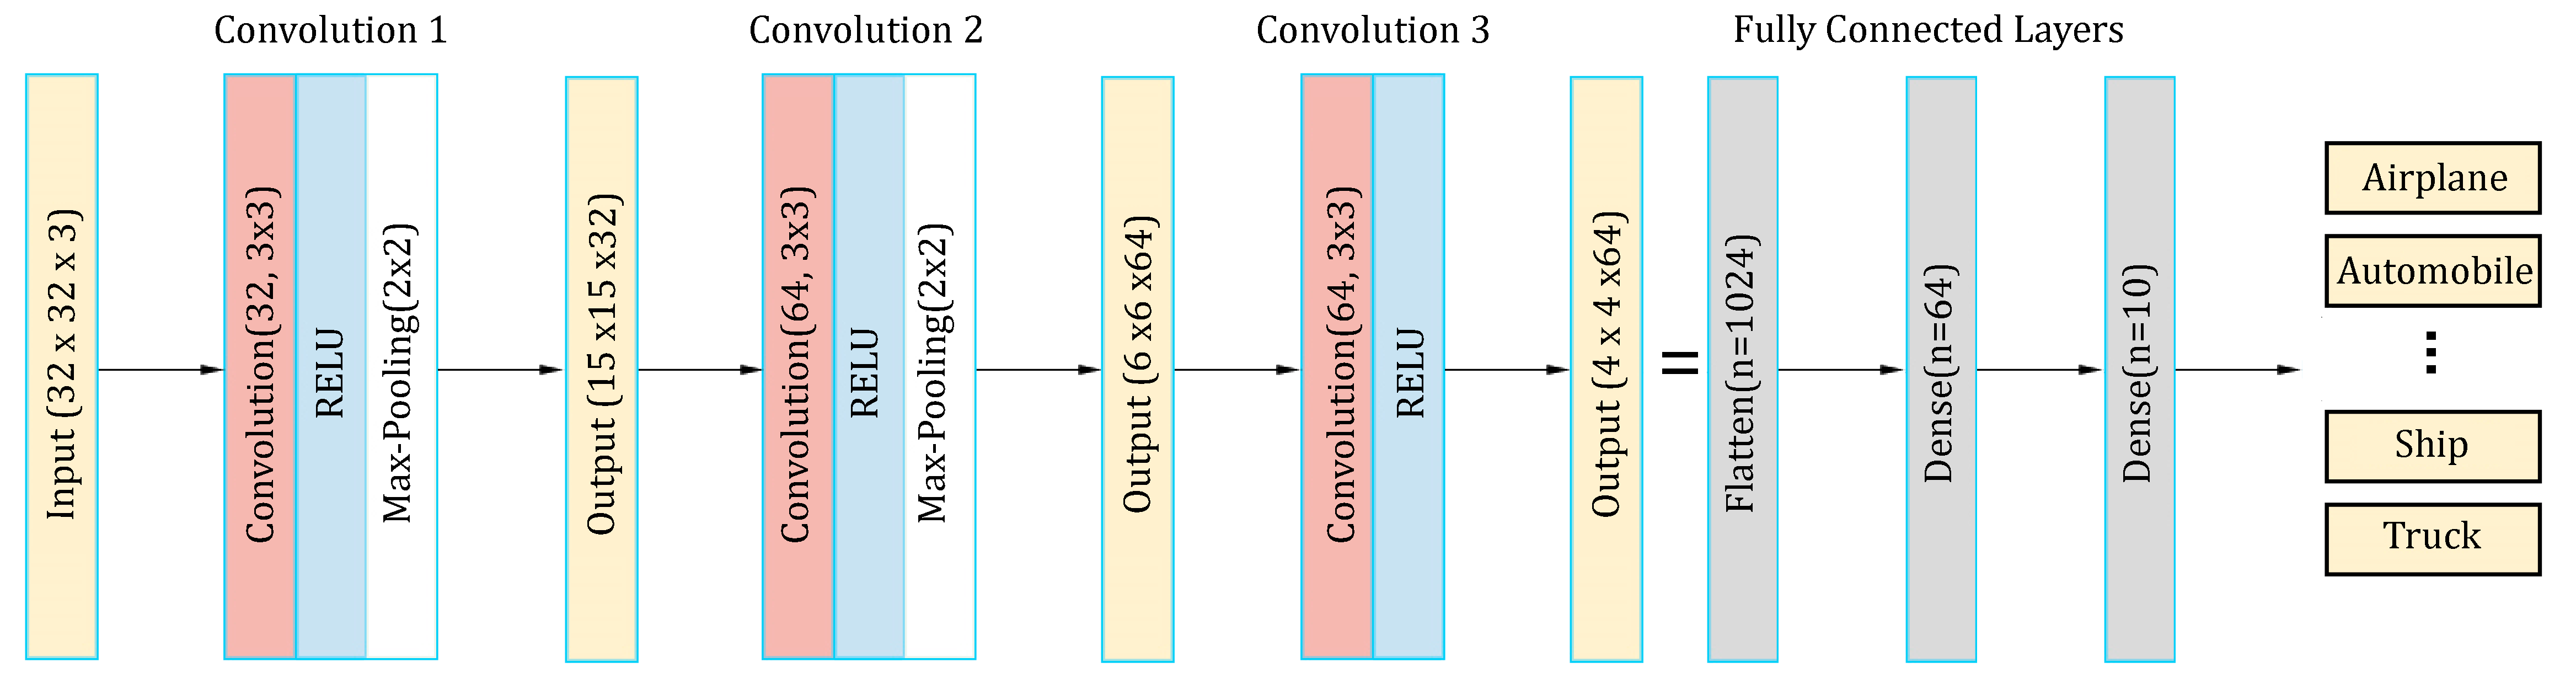

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#### A CONTINUACIÓN SE DETALLAN CADA UNA DE LAS CAPAS DEL MODELO Y LOS OUTPUTS QUE RETORNA UNA VEZ REALIZADA YA SEA LA CONVOLUCIÓN, EL SUBSAMPLING O EL DENSE

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

##### SE DEFINE QUE LAS MÉTRICAS IMPORTANTES PARA ESTE MODELO, QUE ES LA PRECISIÓN
##### EL OPTIMIZADOR Y LA FUNCIÓN DE PÉRDIDA SE MANEJAN COMO CAJAS NEGRAS, PERO SUS OBJETIVOS SON DEFINIR LA FORMA EN QUE EL MODELO ENTRENARÁ
##### FINALMENTE SE ENTRENA EL MODELO CON LOS DATOS DE ENTRENAMIENTO Y LOS VALORES DE VALIDACIÓN

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_data, train_label, epochs=10, 
                    validation_data=(validation_data, validation_label))

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 144s 3ms/sample - loss: 1.5287 - accuracy: 0.4400 - val_loss: 1.2635 - val_accuracy: 0.5434
Epoch 2/10
45000/45000 [==============================] - 143s 3ms/sample - loss: 1.1769 - accuracy: 0.5808 - val_loss: 1.1074 - val_accuracy: 0.6056
Epoch 3/10
45000/45000 [==============================] - 149s 3ms/sample - loss: 1.0346 - accuracy: 0.6323 - val_loss: 1.0012 - val_accuracy: 0.6500
Epoch 4/10
45000/45000 [==============================] - 150s 3ms/sample - loss: 0.9394 - accuracy: 0.6682 - val_loss: 0.9505 - val_accuracy: 0.6714
Epoch 5/10
45000/45000 [==============================] - 148s 3ms/sample - loss: 0.8595 - accuracy: 0.6976 - val_loss: 0.9250 - val_accuracy: 0.6762
Epoch 6/10
45000/45000 [==============================] - 133s 3ms/sample - loss: 0.8057 - accuracy: 0.7158 - val_loss: 0.9069 - val_accuracy: 0.6918
Epoch 7/10
45000/45000 [===========================

### [OPCIONAL] Guardar el modelo en un archivo local (para no tener que reentrenarlo >_<)

In [51]:
path_model = 'modelo_entrenado'
if not os.path.exists(path_model):
    os.mkdir(path_model)
model.save( '.\\'+  path_model + '\\modelo_cifar')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: .\modelo_entrenado\modelo_cifar\assets


# EVALUACIÓN GENERAL DEL MODELO

### PRIMERAMENTE DESPLEGAREMOS UN GRÁFICO QUE MUESTRA LA PRECISIÓN DEL MODELO EN CADA ITERACIÓN DE ENTRENAMIENTO DEL CNN

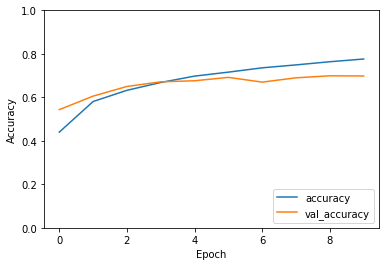

In [52]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

### LUEGO, EVALUAMOS EL MODELO CON RESPECTO A TODOS LAS IMÁGENES DE TESTING Y OBTENEMOS LA PRECISIÓN GENERAL DEL MODELO

In [53]:
test_loss, test_acc = model.evaluate(testing_data.tolist(), testing_label, verbose=2)
print("PRECISIÓN",test_acc)

10000/10000 - 7s - loss: 0.8869 - accuracy: 0.7078
PRECISIÓN 0.7078


### FINALMENTE PROCEDEMOS A REALIZAR LOS CLÁSICOS CALCULOS DE MÉTRICAS DE LA MATRIZ DE CONFUSIÓN Y DE EL REPORTE DE CLASIFICACIÓN

In [54]:
### CARGAMOS EL MODELO CNN DE LA COPIA DEL ARCHIVO LOCAL
new_model = tf.keras.models.load_model('./'+ path_model + '/modelo_cifar')

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
# REALIZAMOS LA PREDICCIÓN DE LOS DATOS DE TESTING
predictions = new_model.predict(testing_data)

### ESTO RETORNA UNA MATRIZ CON LOS VALORES DE PREDICCIÓN CON CADA UNA DE LAS CLASES DE CIFAR-10
#### A CONTINUACIÓN SE MUESTRA LA MATRIZ DE LA IMAGEN 0 DE LOS DATOS DE PREDICCIÓN, ENTRE MÁS POSITIVO EL VALOR DE LA CLASE, MÁS PROBABILIDAD HAY DE QUE LA IMAGEN PERTENEZCA A DICHA CLASE

In [57]:
predictions[0]

array([-2.1262596 , -2.2574914 , -1.8873959 ,  3.771379  , -3.3558013 ,
        1.6859959 ,  1.6327064 , -8.988179  ,  0.53261435, -1.2690228 ],
      dtype=float32)

In [58]:
def Dejar_Max_Prediction(prediction):
    """MÉTODO QUE OBTIENE LAS PREDICCIONES DE UNA IMAGEN Y RETORNA LA CLASE CON MAYOR VALOR DE CLASIFICACIÓN/PREDICCIÓN
    
    PARÁMETROS
    prediction -- PREDICCIONES DE IMÁGENES DE TESTING SEGÚN EL MODELO CNN
    
    RETORNA
    new_prediction -- RETORNA UN VECTOR COLUMNA CON LOS VALORES DE CLASE A LAS CUALES DEBERÍA PERTECER CADA IMAGEN DE TESTEO SEGÚN EL MODELO CNN
    """
    new_prediction = []
    for i in range(prediction.shape[0]):
        new_prediction.append(np.argmax(prediction[i]))
    return new_prediction

In [59]:
new_prediction = Dejar_Max_Prediction(predictions)

In [60]:
# MATRIZ DE CONFUSIÓN
print(confusion_matrix(testing_label,new_prediction))

[[785   7  44  17  11   6   8  11  72  39]
 [ 39 707   6   9   8   4   6   5  33 183]
 [ 66   4 525 128  87  95  40  23  20  12]
 [ 22   3  31 574  74 194  35  28  16  23]
 [ 26   2  40  89 701  48  26  50  15   3]
 [ 23   3  26 184  44 660  11  30  10   9]
 [  9   4  38  85  66  37 733   7  14   7]
 [ 17   1  22  47  72  99   7 712   4  19]
 [ 82  10   6  16   8   7   3   4 833  31]
 [ 29  34   3  22  10   3   4  12  35 848]]


In [61]:
# REPORTE DE CLASIFICACIÓN
# EN NUESTRO PROYECTO LA METRICA DE EVALUACIÓN IMPORTANTE ES LA PRECISIÓN
print(classification_report(testing_label,new_prediction))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1000
           1       0.91      0.71      0.80      1000
           2       0.71      0.53      0.60      1000
           3       0.49      0.57      0.53      1000
           4       0.65      0.70      0.67      1000
           5       0.57      0.66      0.61      1000
           6       0.84      0.73      0.78      1000
           7       0.81      0.71      0.76      1000
           8       0.79      0.83      0.81      1000
           9       0.72      0.85      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



# EVALUACIÓN POR IMAGEN DEL MODELO

In [63]:
def ObtenerPrediccionImage(idx):
    """PROCEDIMIENTO QUE DESPLIEGA UNA IMAGEN DE TESTEO Y LAS PREDICCIONES DE LA CLASE A LA CUAL DEBERÍA PERTENECER SEGÚN EL MODELO CNN
    
    DESPLIEGA DE UN GRÁFICO DE BARRAS LAS PREDICCIONES DEL MODELO CON LAS CLASES MÁS PROBABLES A LA CUALES DEBERÍA
    PERTENECER LA IMAGEN SELECCIONADA.
    ADEMÁS DESPLIEGA LA IMAGEN SELECCIONADA Y LA CLASE ORIGINAL DE ELLA PARA PERMITIR UNA MEJOR COMPARACIÓN POR PARTE DEL USUARIO
    
    PARÁMETROS
    idx -- NÚMERO DE LA IMAGEN DEL CONJUNTO DE IMÁGENES DE TESTEO (PUEDE SER DESDE 0 A 9999)
    """
    test_data, test_label = Load_File('preprocess_training'+extension_archivo)
    if (idx < 0 or idx >= test_data.shape[0]):
        print("INDICE FUERA DE RANGO")
        return None
    plotimage = test_data[idx]
    image = np.reshape(plotimage, (1,32,32,3))
    predicted_label = new_model.predict(image)
    new_predicted = []
    for i in range(len(predicted_label[0])):
        if(predicted_label[0][i] > 0):
            new_predicted.append(i)
    pred_names = [label_names[pred_i] for pred_i in new_predicted]
    figur, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 3), squeeze=False)
    figur.tight_layout()
    margin = 0.05
    ind = np.arange(len(pred_names))
    width = (1. - 2. * margin)
    figur.suptitle('PREDICCIÓN IMAGEN : ' + str(idx), fontsize=20, y=1.1)
    axis[0][0].imshow(test_data[idx],cmap=plt.cm.binary)
    axis[0][0].set_title(label_names[test_label[idx]])
    axis[0][0].set_axis_off()
    axis[0][1].set_yticks(ind + margin)
    axis[0][1].set_yticklabels(pred_names)
    axis[0][1].barh(ind + margin, predicted_label[0][predicted_label[0]>0], width, color='greenyellow')

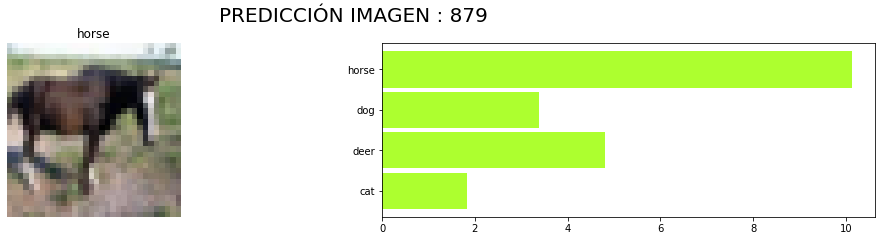

In [64]:
ObtenerPrediccionImage(879)

In [65]:
def ObtenerImageGanador(idx):
    """PROCEDIMIENTO QUE DESPLIEGA UNA IMAGEN DE TESTEO Y LAS PREDICCIONES DE LA CLASE MÁS PROBABLE SEGÚN EL MODELO
    
    DESPLIEGA LA IMAGEN SELECCIONADA Y LA CLASE ORIGINAL DE LA IMAGEN PARA PERMITIR UNA MEJOR COMPARACIÓN POR PARTE DEL USUARIO
    ADEMÁS INDICA LA PREDICCIÓN DE LA CLASE A LA CUAL DEBERIA PERTENECER LA IMAGEN SEGÚN EL MODELO CNN
    INDICANDO A SU VEZ SI LA PREDICCIÓN FUE CORRECTA O INCORRECTA!
    
    
    PARÁMETROS
    idx -- NÚMERO DE LA IMAGEN DEL CONJUNTO DE IMÁGENES DE TESTEO (PUEDE SER DESDE 0 A 9999)
    """
    test_data, test_label = Load_File('preprocess_training'+extension_archivo)
    if (idx < 0 or idx >= test_data.shape[0]):
        print("INDICE FUERA DE RANGO")
        return None
    plotimage = test_data[idx]
    image = np.reshape(plotimage, (1,32,32,3))
    predicted_class = label_names[np.argmax(new_model.predict(image))]
    figur, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 3), squeeze=False)
    figur.tight_layout()
    figur.suptitle('PREDICCIÓN IMAGEN : ' + str(idx), fontsize=20, y=1.1)
    axis[0][0].imshow(test_data[idx],cmap=plt.cm.binary)
    axis[0][0].set_title(label_names[test_label[idx]])
    axis[0][0].set_axis_off()
    axis[0][1].text(0.5, 0.5, 'GANADOR: ' + predicted_class,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=60, color='blue',
        transform=axis[0][1].transAxes)
    if(predicted_class == label_names[test_label[idx]]):
        colore, estatus = 'green', 'Predicción Correcta! UwU'
    else:
        colore, estatus = 'red', 'Predicción Incorrecta! U_U'
    axis[0][1].text(0.5, 0.2, estatus,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=25, color=colore,
        transform=axis[0][1].transAxes)
    axis[0][1].set_axis_off()

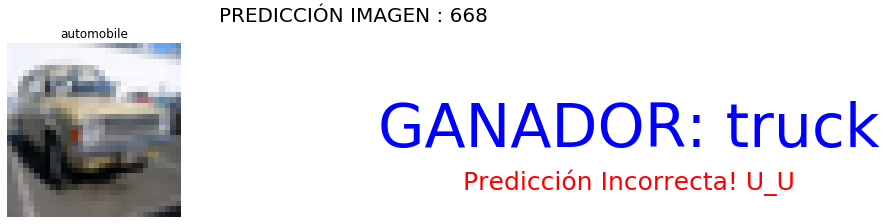

In [66]:
ObtenerImageGanador(668)

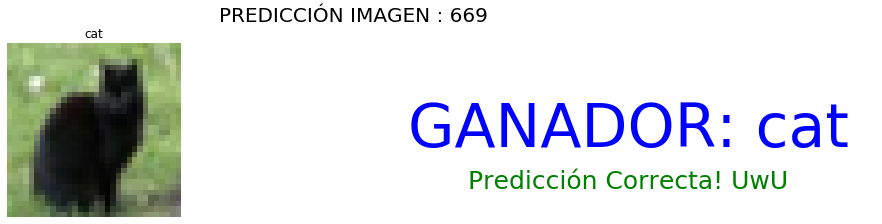

In [67]:
ObtenerImageGanador(669)

### GRACIAS POR SU ATENCIÓN :D